In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_curve,
    auc,
)
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
#import xgboost as xgb
#from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

# Data preprocessing

In [2]:
#load data
df = pd.read_csv("credit_risk.csv")
df.head()

,Id,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
0,0,22,59000,RENT,123.0,PERSONAL,35000,16.02,1,0.59,Y,3
1,1,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2
2,2,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,N,3
3,3,23,65500,RENT,4.0,MEDICAL,35000,15.23,1,0.53,N,2
4,4,24,54400,RENT,8.0,MEDICAL,35000,14.27,1,0.55,Y,4


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              32581 non-null  int64  
 1   Age             32581 non-null  int64  
 2   Income          32581 non-null  int64  
 3   Home            32581 non-null  object 
 4   Emp_length      31686 non-null  float64
 5   Intent          32581 non-null  object 
 6   Amount          32581 non-null  int64  
 7   Rate            29465 non-null  float64
 8   Status          32581 non-null  int64  
 9   Percent_income  32581 non-null  float64
 10  Default         32581 non-null  object 
 11  Cred_length     32581 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 3.0+ MB


In [4]:
df.describe()

,Id,Age,Income,Emp_length,Amount,Rate,Status,Percent_income,Cred_length
count,32581.000000,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,16290.006139,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,9405.479594,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,0.000000,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,8145.000000,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,16290.000000,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,24435.000000,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,32780.000000,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [5]:
#check null values
df.isnull().sum()

Id                   0
Age                  0
Income               0
Home                 0
Emp_length         895
Intent               0
Amount               0
Rate              3116
Status               0
Percent_income       0
Default              0
Cred_length          0
dtype: int64

In [6]:
#Fill null valus with their mean
mean_Emp_length = df['Emp_length'].mean()
mean_Rate = df['Rate'].mean()
print(mean_Emp_length)
print(mean_Rate)

4.789686296787225
11.011694892245036


In [7]:
df['Emp_length'] = df['Emp_length'].fillna(mean_Emp_length)
df['Rate'] = df['Rate'].fillna(mean_Rate)

In [8]:
df.isnull().sum()

Id                0
Age               0
Income            0
Home              0
Emp_length        0
Intent            0
Amount            0
Rate              0
Status            0
Percent_income    0
Default           0
Cred_length       0
dtype: int64

# Exploratory Data Analysis

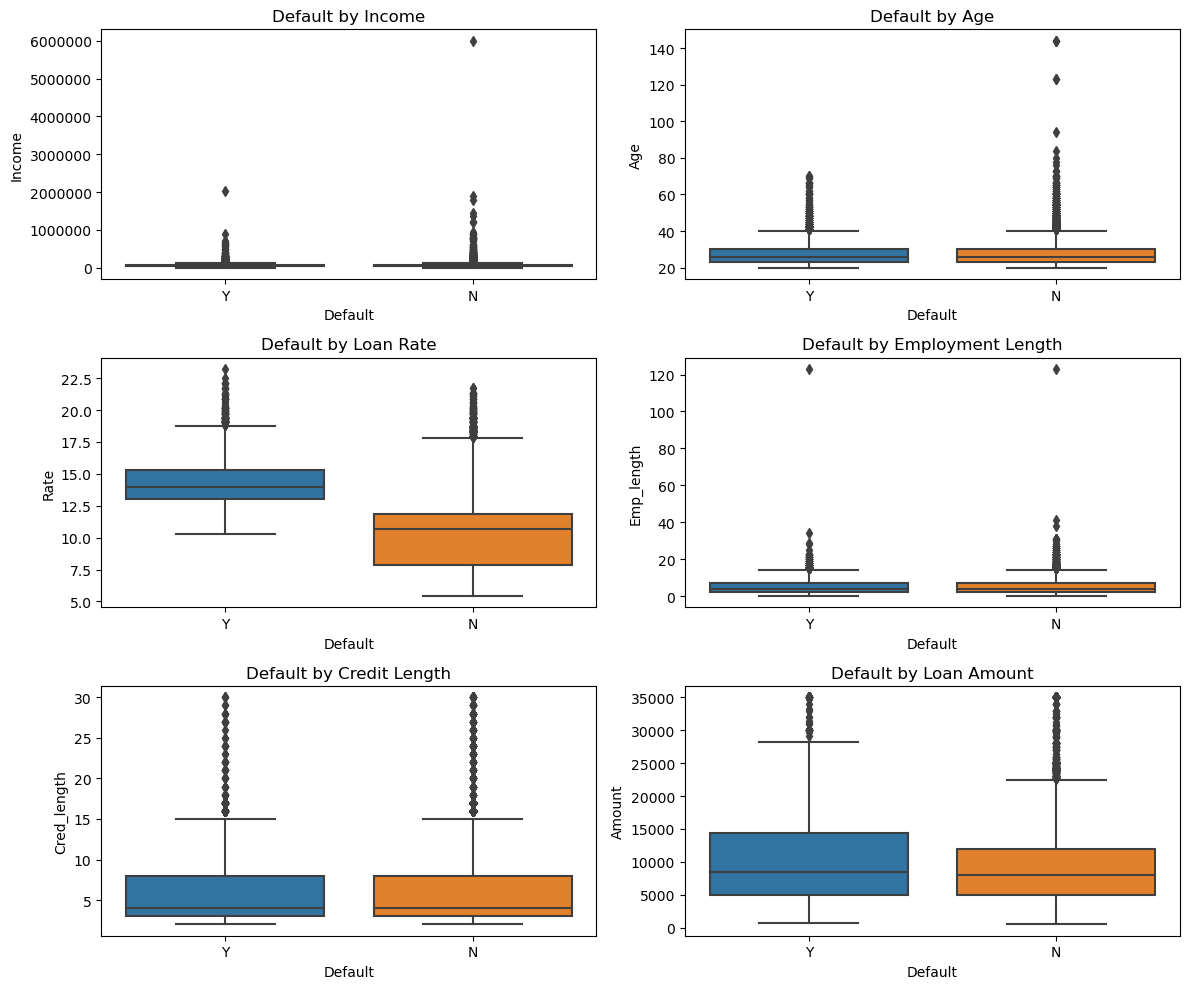

In [9]:
fig, axes = plt.subplots(3, 2, figsize=(12, 10))

sns.boxplot(data = df, x="Default", y="Income", ax=axes[0,0])
axes[0,0].set_title("Default by Income")
axes[0,0].ticklabel_format(style='plain', axis='y')

sns.boxplot(data = df, x="Default", y="Age", ax=axes[0,1])
axes[0,1].set_title("Default by Age")

sns.boxplot(data = df, x="Default", y="Emp_length", ax=axes[1,1])
axes[1,1].set_title("Default by Employment Length")

sns.boxplot(data = df, x="Default", y="Rate", ax=axes[1,0])
axes[1,0].set_title("Default by Loan Rate")

sns.boxplot(data = df, x="Default", y="Amount", ax=axes[2,1])
axes[2,1].set_title("Default by Loan Amount")

sns.boxplot(data = df, x="Default", y="Cred_length", ax=axes[2,0])
axes[2,0].set_title("Default by Credit Length")

plt.tight_layout()

There are alot of out-liers, we need to  fix them

# Correlations between features and credit risk

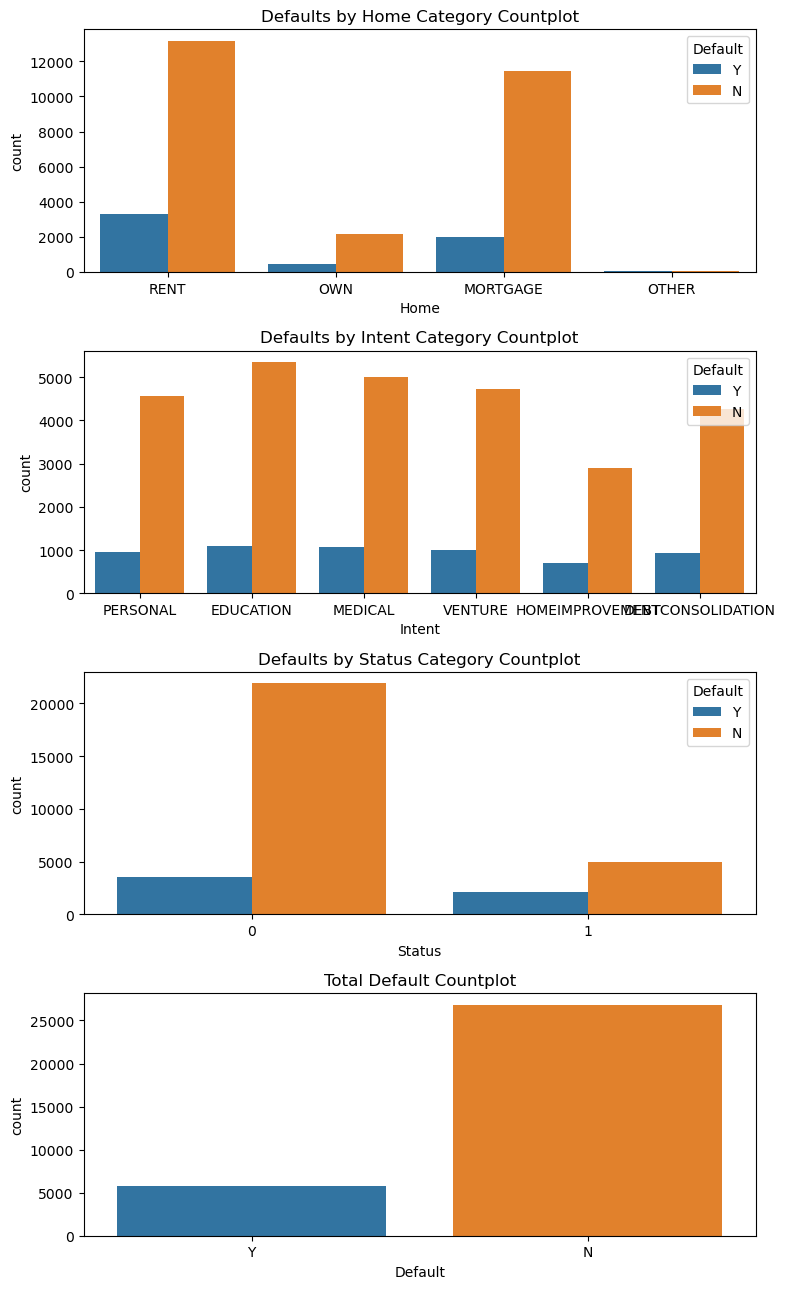

In [10]:
fig, axes = plt.subplots(4,1, figsize=(8,13))
sns.countplot(x=df["Home"], hue=df['Default'], ax=axes[0])
axes[0].set_title("Defaults by Home Category Countplot")

sns.countplot(x=df["Intent"], hue=df['Default'], ax=axes[1])
axes[1].set_title("Defaults by Intent Category Countplot")

sns.countplot(x=df["Status"], hue=df['Default'], ax=axes[2])
axes[2].set_title("Defaults by Status Category Countplot")

sns.countplot(x=df["Default"], ax=axes[3])
axes[3].set_title("Total Default Countplot")

plt.tight_layout()
plt.show()

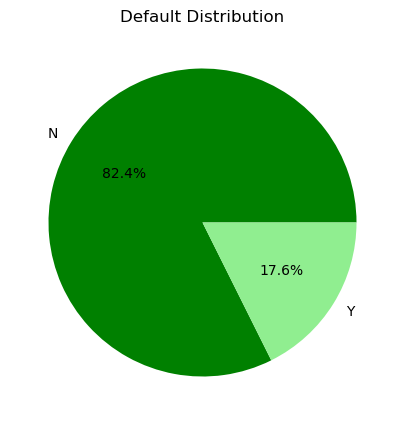

In [11]:
# Pie chart for Loan Default Status
plt.figure(figsize=(5, 5))
df['Default'].value_counts().plot.pie(autopct='%1.1f%%', colors=['green', 'lightgreen'])

plt.title('Default Distribution')
plt.ylabel('') 
plt.show()

# Catagorical d\isribution

In [12]:
df_encoded = pd.get_dummies(df, columns=["Home", "Intent"], drop_first=True)
df_encoded['Default'] = [1 if i == "Y" else 0 for i in df['Default']]

In [13]:
df_encoded.head()

,Id,Age,Income,Emp_length,Amount,Rate,Status,Percent_income,Default,Cred_length,Home_OTHER,Home_OWN,Home_RENT,Intent_EDUCATION,Intent_HOMEIMPROVEMENT,Intent_MEDICAL,Intent_PERSONAL,Intent_VENTURE
0,0,22,59000,123.0,35000,16.02,1,0.59,1,3,False,False,True,False,False,False,True,False
1,1,21,9600,5.0,1000,11.14,0,0.10,0,2,False,True,False,True,False,False,False,False
2,2,25,9600,1.0,5500,12.87,1,0.57,0,3,False,False,False,False,False,True,False,False
3,3,23,65500,4.0,35000,15.23,1,0.53,0,2,False,False,True,False,False,True,False,False
4,4,24,54400,8.0,35000,14.27,1,0.55,1,4,False,False,True,False,False,True,False,False


In [14]:
#drop id column
df_cleaned = df_encoded.drop(["Id"], axis = 1)

In [15]:
df_cleaned.head()

,Age,Income,Emp_length,Amount,Rate,Status,Percent_income,Default,Cred_length,Home_OTHER,Home_OWN,Home_RENT,Intent_EDUCATION,Intent_HOMEIMPROVEMENT,Intent_MEDICAL,Intent_PERSONAL,Intent_VENTURE
0,22,59000,123.0,35000,16.02,1,0.59,1,3,False,False,True,False,False,False,True,False
1,21,9600,5.0,1000,11.14,0,0.10,0,2,False,True,False,True,False,False,False,False
2,25,9600,1.0,5500,12.87,1,0.57,0,3,False,False,False,False,False,True,False,False
3,23,65500,4.0,35000,15.23,1,0.53,0,2,False,False,True,False,False,True,False,False
4,24,54400,8.0,35000,14.27,1,0.55,1,4,False,False,True,False,False,True,False,False


# Spliting Training and Test Data

In [16]:
X = df_cleaned.drop(columns=['Default'])
y = df_cleaned['Default']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Selection 

In [17]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Train and evaluate models using cross-validation
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print(f'{name}:')
    print('Cross-validation scores:', scores)
    print('Mean accuracy:', scores.mean())
    print()

# Train models on the entire training data
for name, model in models.items():
    model.fit(X_train, y_train)

# Evaluate models on the test data
for name, model in models.items():
    accuracy = model.score(X_test, y_test)
    print(f'{name} Test Accuracy: {accuracy}')

Logistic Regression:
Cross-validation scores: [0.8219835  0.82428544 0.82543641 0.82677921 0.82540292]
Mean accuracy: 0.8247774948366141

Decision Tree:
Cross-validation scores: [0.81680414 0.81143296 0.82486092 0.81181661 0.81273983]
Mean accuracy: 0.8155308935289145

Random Forest:
Cross-validation scores: [0.82601189 0.82601189 0.83157491 0.82601189 0.82463546]
Mean accuracy: 0.8268492091101722

Gradient Boosting:
Cross-validation scores: [0.81987339 0.83061577 0.83119125 0.82601189 0.83135073]
Mean accuracy: 0.8278086073558061

Logistic Regression Test Accuracy: 0.8166334202854074
Decision Tree Test Accuracy: 0.8091146232929262
Random Forest Test Accuracy: 0.8244591069510511
Gradient Boosting Test Accuracy: 0.8256866656437011


#  Hyperparameter Tuning

In [18]:
param_grid = {
    'Logistic Regression': {'C': [0.1, 1.0, 10.0]},
    'Decision Tree': {'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]},
    'Random Forest': {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]},
    'Gradient Boosting': {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.1, 1.0], 'max_depth': [3, 5, 7]}
}

best_models = {}

for name, model in models.items():
    print(f"Tuning hyperparameters for {name}...")
    if name in param_grid:
        param_search = GridSearchCV(model, param_grid[name], cv=5, scoring='accuracy')
        param_search.fit(X_train, y_train)
        best_models[name] = param_search.best_estimator_
        print(f"Best parameters: {param_search.best_params_}")
        print(f"Best cross-validation accuracy: {param_search.best_score_:.4f}")

# Evaluate the best models on the test set
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\n{name} Test Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))

Tuning hyperparameters for Logistic Regression...
Best parameters: {'C': 0.1}
Best cross-validation accuracy: 0.8257
Tuning hyperparameters for Decision Tree...
Best parameters: {'max_depth': 10, 'min_samples_split': 10}
Best cross-validation accuracy: 0.8260
Tuning hyperparameters for Random Forest...
Best parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 300}
Best cross-validation accuracy: 0.8275
Tuning hyperparameters for Gradient Boosting...
Best parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100}
Best cross-validation accuracy: 0.8282

Logistic Regression Test Accuracy: 0.8166
              precision    recall  f1-score   support

           0       0.82      1.00      0.90      5322
           1       0.00      0.00      0.00      1195

    accuracy                           0.82      6517
   macro avg       0.41      0.50      0.45      6517
weighted avg       0.67      0.82      0.73      6517


Decision Tree Test Accuracy: 0.8283
    

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Evaluate the trained models on the testing set
results = {}

for name, model in best_models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    
    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1,
        'ROC AUC': roc_auc
    }

# Print results
print("Model Evaluation Results:")
for name, metrics in results.items():
    print(f"\n{name}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")

# Compare the performance of different models
print("\nModel Comparison:")
for name, metrics in results.items():
    print(f"\n{name}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")


Model Evaluation Results:

Logistic Regression:
Accuracy: 0.8166
Precision: 0.0000
Recall: 0.0000
F1-score: 0.0000
ROC AUC: 0.5000

Decision Tree:
Accuracy: 0.8283
Precision: 0.5369
Recall: 0.4628
F1-score: 0.4971
ROC AUC: 0.6866

Random Forest:
Accuracy: 0.8242
Precision: 0.5268
Recall: 0.4025
F1-score: 0.4564
ROC AUC: 0.6607

Gradient Boosting:
Accuracy: 0.8304
Precision: 0.5463
Recall: 0.4444
F1-score: 0.4901
ROC AUC: 0.6807

Model Comparison:

Logistic Regression:
Accuracy: 0.8166
Precision: 0.0000
Recall: 0.0000
F1-score: 0.0000
ROC AUC: 0.5000

Decision Tree:
Accuracy: 0.8283
Precision: 0.5369
Recall: 0.4628
F1-score: 0.4971
ROC AUC: 0.6866

Random Forest:
Accuracy: 0.8242
Precision: 0.5268
Recall: 0.4025
F1-score: 0.4564
ROC AUC: 0.6607

Gradient Boosting:
Accuracy: 0.8304
Precision: 0.5463
Recall: 0.4444
F1-score: 0.4901
ROC AUC: 0.6807


#  Interpretability and Actionable Insights

Feature Importance:
                   Feature  Importance
4                     Rate    0.447362
1                   Income    0.108446
3                   Amount    0.086051
6           Percent_income    0.080528
0                      Age    0.067128
2               Emp_length    0.063608
7              Cred_length    0.054040
5                   Status    0.024292
11        Intent_EDUCATION    0.011181
13          Intent_MEDICAL    0.010843
10               Home_RENT    0.010522
14         Intent_PERSONAL    0.010321
15          Intent_VENTURE    0.010316
12  Intent_HOMEIMPROVEMENT    0.008569
9                 Home_OWN    0.005503
8               Home_OTHER    0.001291


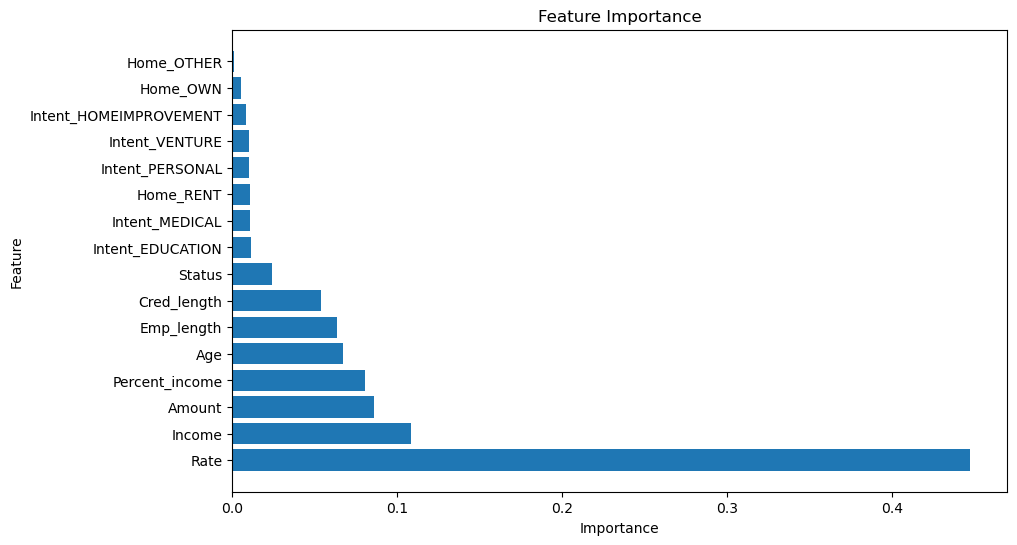

In [20]:
# Get feature importance from the best random forest model
feature_importance = best_models['Random Forest'].feature_importances_

# Create a DataFrame to display feature importance scores
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print feature importance
print("Feature Importance:")
print(feature_importance_df)

# Visualize feature importance
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()